## GRIP task 5

We explore business analytics with the help of a super store dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data cleaning

First we check if there are any null values in the dataset

In [3]:
df.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

The dataset does not have any null values in any of the columns

Then we check what type of dataset we are dealing with (datatype of columns etc)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


We have no requirement of modifying the dataset as it is already considered clean.

### Data visualization

First we explore the shipping mode variable of the dataset

### Shipping mode

Text(0, 0.5, 'Number of orders')

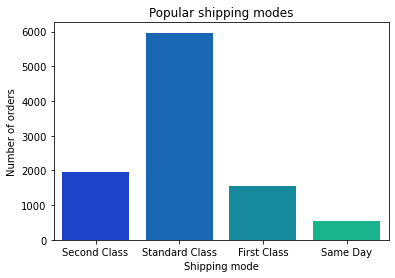

In [5]:
sns.countplot('Ship Mode',data=df,palette='winter')

plt.title('Popular shipping modes')
plt.xlabel('Shipping mode')
plt.ylabel('Number of orders')

The above graph gives the distribution of shipping mode vs number of orders

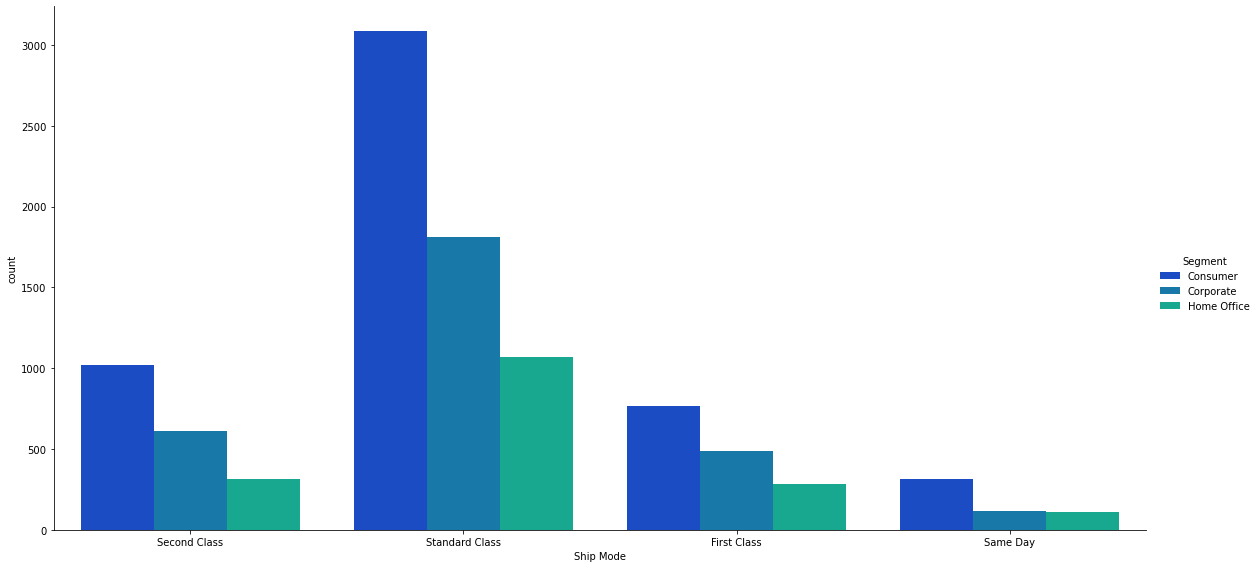

In [6]:
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',palette='winter',aspect=2,height=8)

The graph above gives us the same data but shows us the contribution of each segment.

In [7]:
df_segment=df.groupby('Segment')['Quantity'].sum().reset_index()

### Orders by each state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

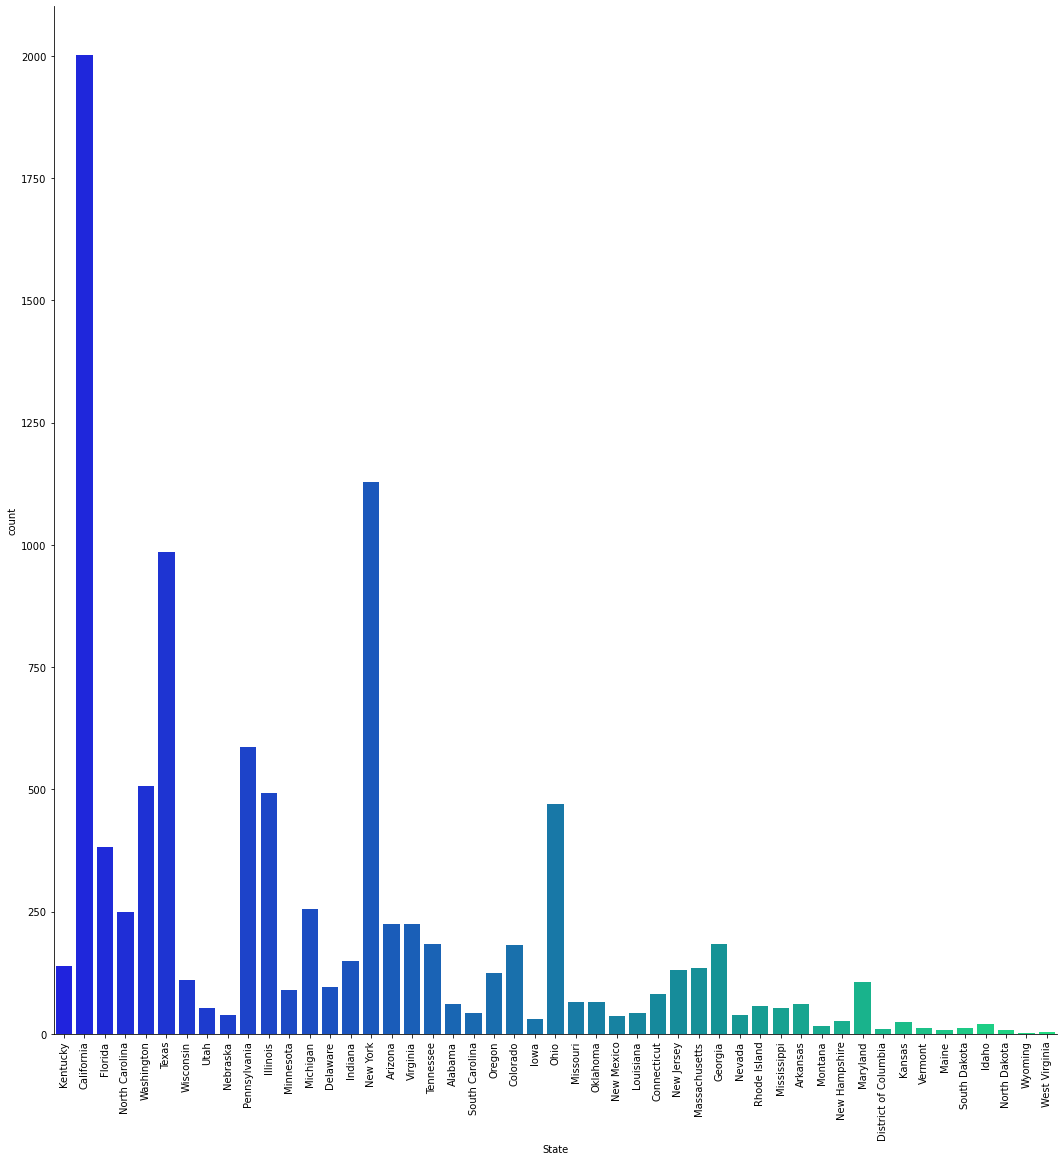

In [8]:
sns.catplot('State',kind='count',data=df,palette='winter',height=15,aspect=1)
plt.xticks(rotation=90)

### Types of orders placed

Text(0.5, 1.0, 'Sub-Category orders placed')

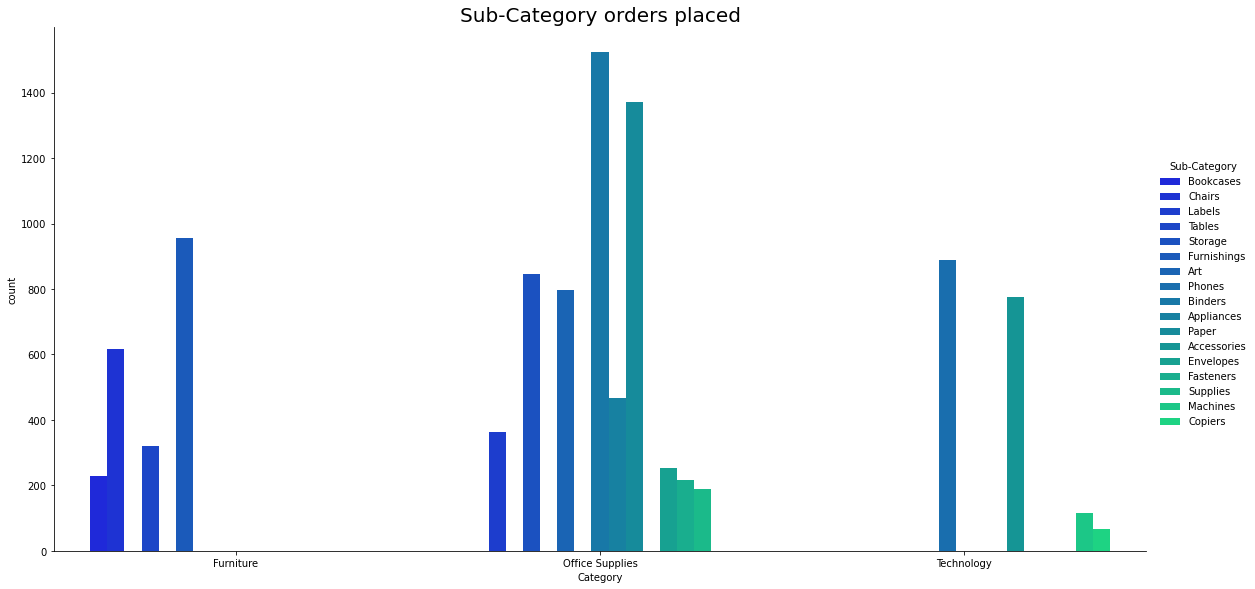

In [9]:
sns.catplot('Category',kind='count',hue='Sub-Category',data=df,height=8,aspect=2,palette='winter')
plt.title('Sub-Category orders placed',size=20)

### Items that contribute the most and the least

Here, we will be visualizing the items that bring in the most profit and the least

In [10]:
df_items=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_items.reset_index(drop=True,inplace=True)

Text(0.5, 6.800000000000029, 'Products')

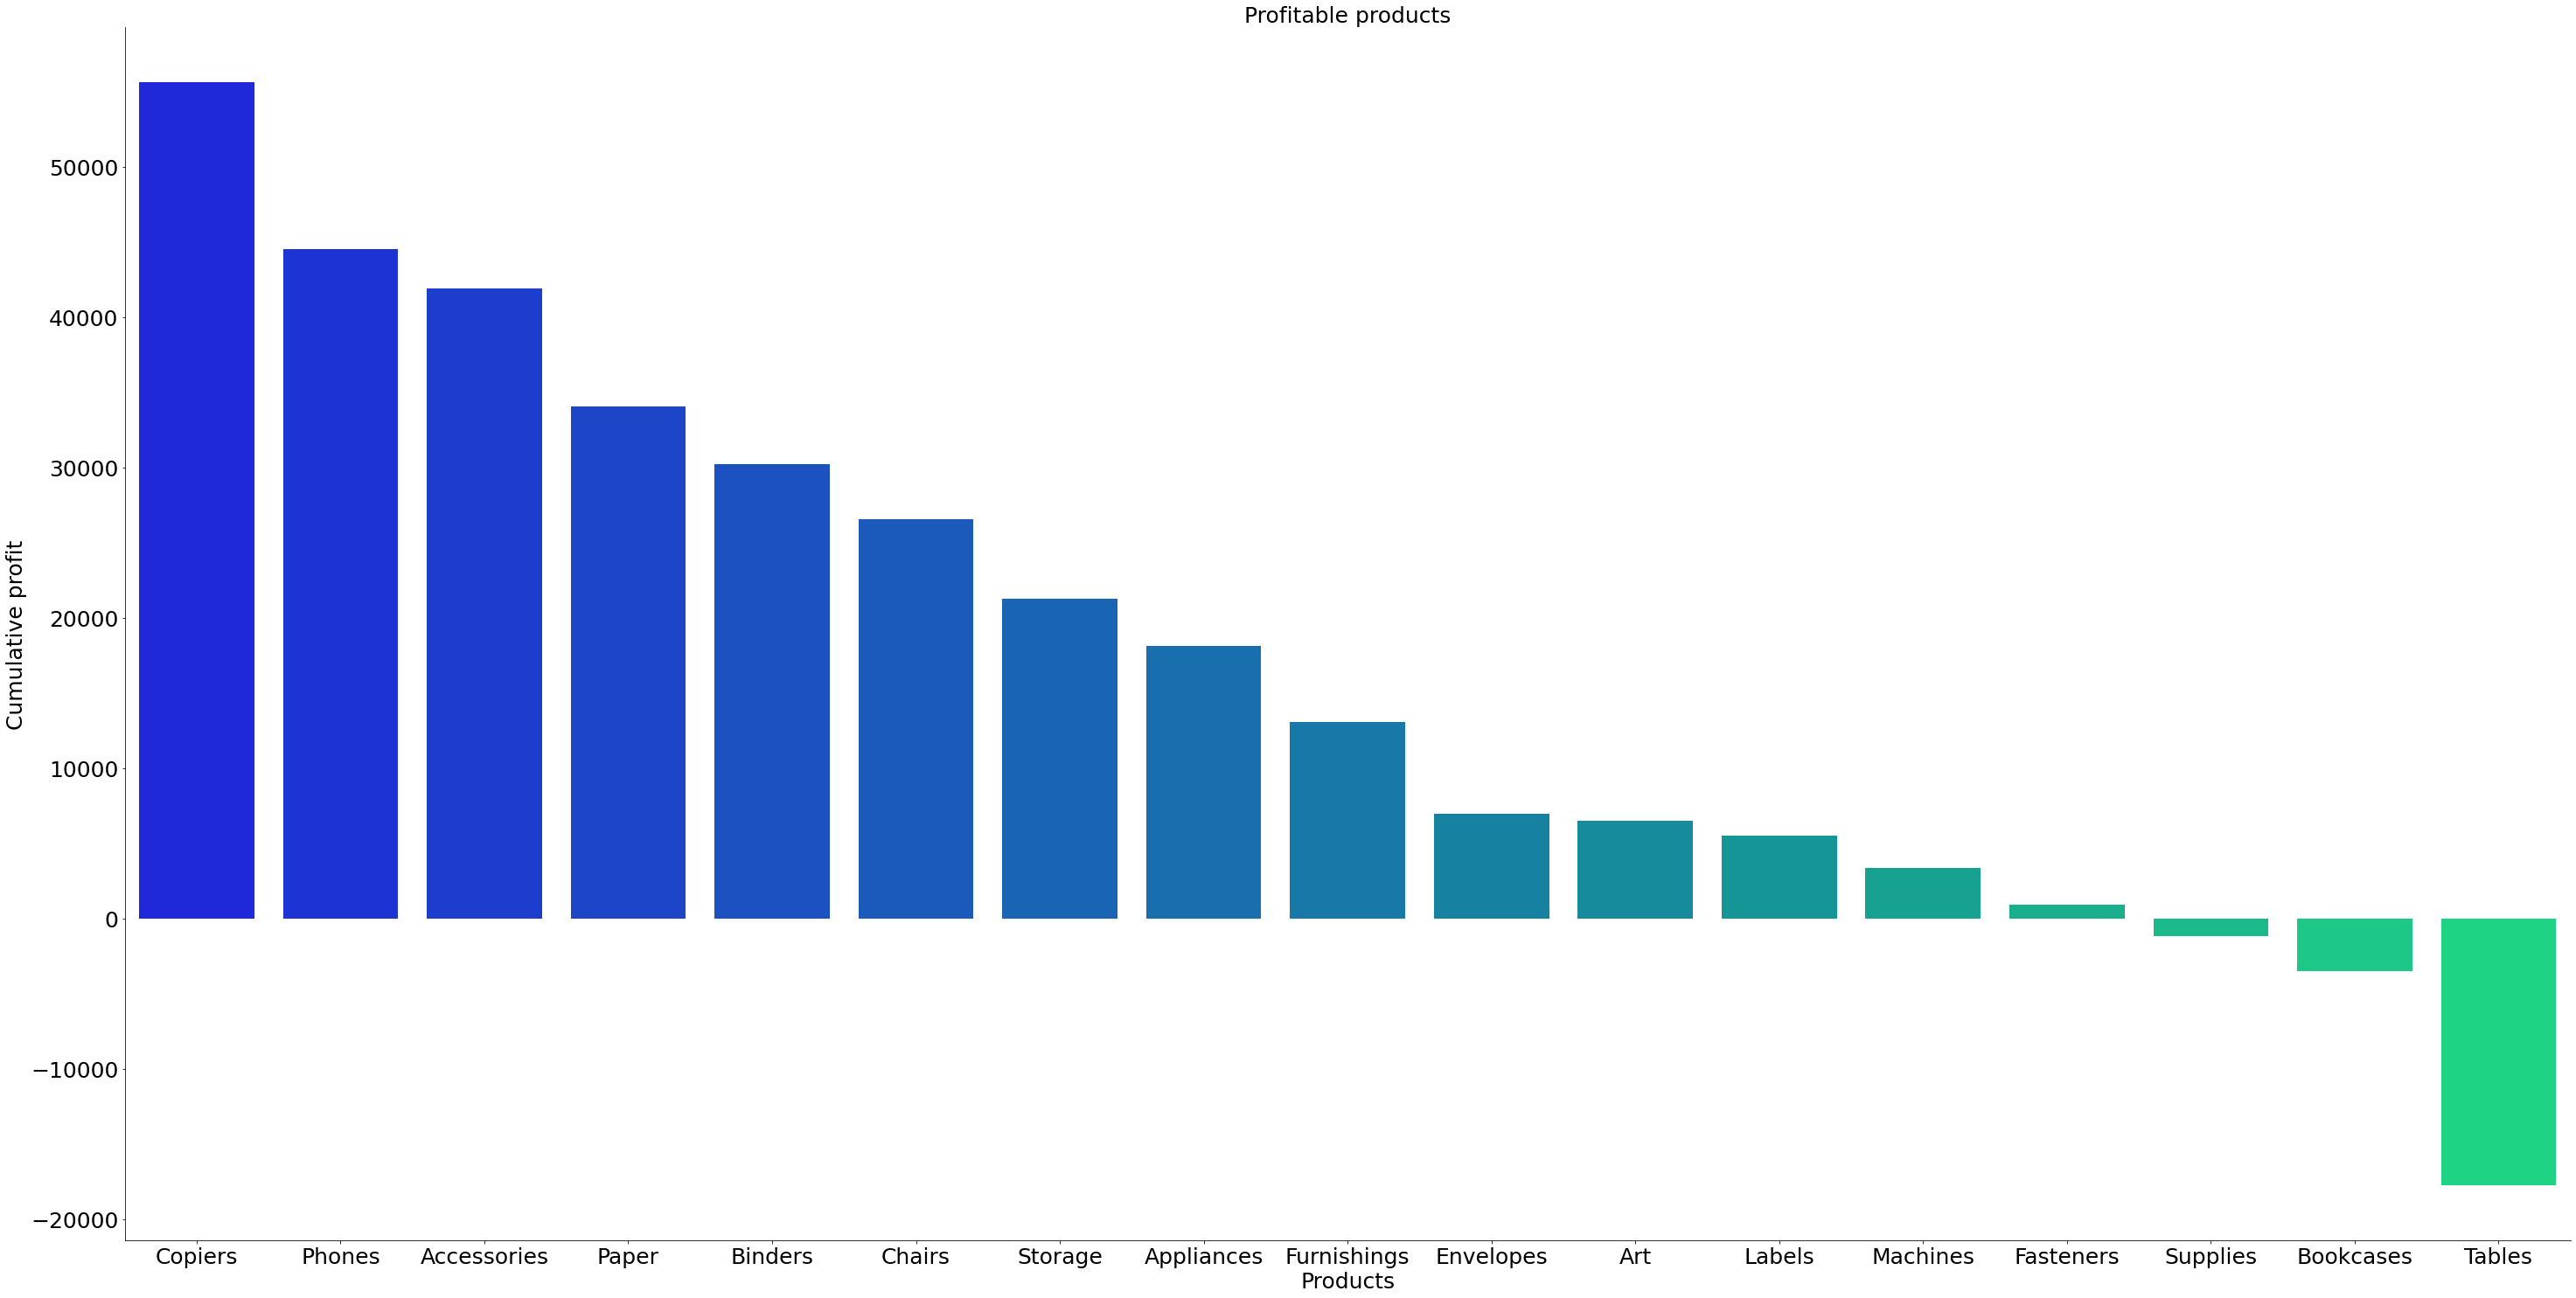

In [11]:
sns.catplot('Sub-Category','Profit',data=df_items,kind='bar',aspect=2,height=20,palette='winter')
plt.title('Profitable products',size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.ylabel('Cumulative profit',size=25)
plt.xlabel('Products',size=25)